In [675]:
import sys
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.datasets import mnist

In [676]:
# Importing Data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

x_train = x_train.reshape(x_train.shape[0], -1) #Reshaping to 2D

# Filter to only those have labels = 0 or 1 
x_train = np.concatenate([x_train[y_train == 0], x_train[y_train == 1]])
y_train = np.concatenate([y_train[y_train == 0], y_train[y_train == 1]])

#------------------------------------------------------------------------

x_test = x_test.astype('float32')
y_test = y_test.astype('int32')

x_test = x_test.reshape(x_test.shape[0], -1) #Reshaping to 2D

# Filter to only those have labels = 0 or 1
x_test = np.concatenate([x_test[y_test == 0], x_test[y_test == 1]])
y_test = np.concatenate([y_test[y_test == 0], y_test[y_test == 1]])

In [678]:
# Shuffling Data
x_train, y_train = shuffle(x_train, y_train)

In [679]:
# Normalizing
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()

In [689]:
def Logistic_Regression(x_train, y_train, learning_Rate = 0.0001, iterations = 1000):
    
    tolerance = 0.0001
    error = np.zeros(iterations)

    w = np.random.rand(x_train.shape[1]) 
    b = np.random.rand(1)

    for i in range(iterations):

        z = np.dot(x_train, w) + b #samples * features * features * 1 = samples * 1
        phiz = 1 / (1 + np.exp(-z))
        
        error[i] = np.mean(-y_train * np.log(phiz + sys.float_info.min) - (1 - y_train) * np.log(1 - phiz + sys.float_info.min))
        
        w = w - (learning_Rate * np.dot((phiz - y_train), x_train)) / x_train.shape[0]
        b = b - (learning_Rate * np.mean(phiz - y_train))

        if error[i] < tolerance:
            break
    
    # Error across iterations
    plt.plot(error)
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()

    return w, b

In [682]:
learning_rates=[0.00001,0.0001,0.001,0.01,0.05]
lr_accuracies=[]

In [683]:
def kfold(X, y, k, learning_rate):

    kfoldAccuracies=np.zeros(k)
    n_samples = X.shape[0]
    fold_size = n_samples // k

    # Shuffle the data
    X,y=shuffle(X,y)

    for i in range(k):
      X_validation_sample=X[i*fold_size:(i+1)*fold_size]
      y_validation_sample=y[i*fold_size:(i+1)*fold_size]

      if(i==0):
        XcrossTrain= X[fold_size:]
        ycrossTrain= y[fold_size:]

      elif(i==k-1): 
        XcrossTrain= X[:(i)*fold_size]
        ycrossTrain= y[:(i)*fold_size]

      else: 
        XcrossTrain= np.concatenate((X[:(i)*fold_size],X[(i+1)*fold_size:]))
        ycrossTrain= np.concatenate((y[:(i)*fold_size],y[(i+1)*fold_size:]))
      
      w, b = Logistic_Regression(XcrossTrain,ycrossTrain,learning_Rate=learning_rate)
      z = np.dot(X_validation_sample, w) + b
      phiz = 1 / (1 + np.exp(-z))
      y_pred = np.where(phiz < 0.5, 0, 1)
      kfoldAccuracies[i]= (np.mean(y_pred == y_validation_sample))*100
    avg_acc=np.mean(kfoldAccuracies)
    return avg_acc



In [684]:
# Validation (10 Fold_Cross_Validation)
for lr in learning_rates:
  lr_accuracies.append(kfold(x_train,y_train,10,lr))
print(lr_accuracies)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[7.631205673758866, 11.635933806146571, 77.84869976359339, 98.7706855791962, 99.80614657210404]


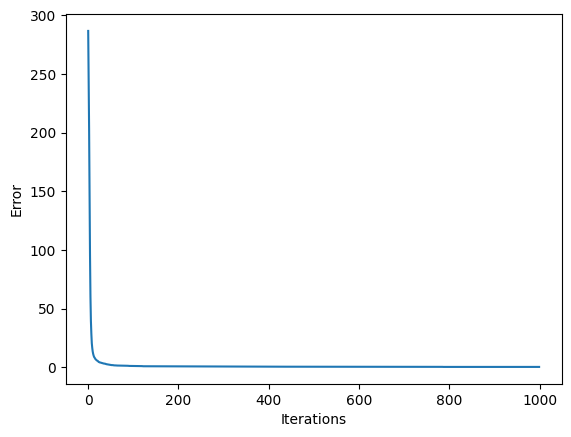

Accuracy: 99.81087470449172%


In [690]:
# Testing
w, b = Logistic_Regression(x_train, y_train, learning_Rate = 0.05, iterations = 1000)
z = np.dot(x_test, w) + b
phiz = 1 / (1 + np.exp(-z))
y_pred = np.where(phiz < 0.5, 0, 1)

# Calculating accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100}%")

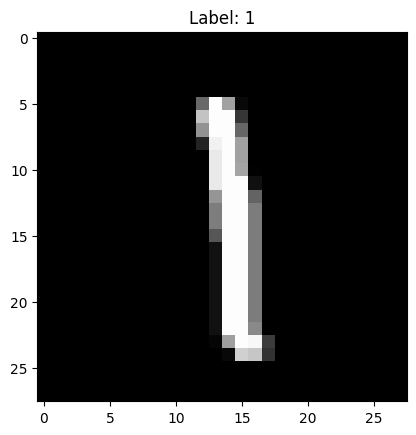

In [691]:
# select a sample image
sample_index = 4
# reshape the 1D array into a 2D array with 28 rows and 28 columns 
sample_img = np.reshape(x_train[sample_index], (28, 28))

# plot the sample image
plt.imshow(sample_img, cmap='gray')
plt.title(f'Label: {y_train[sample_index]}')
plt.show()